In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Nombre alumno: José David Zapata García
# Usuario campus: jzapatagarc

# 1. Preparación y visualización de datos

Antes de iniciar un proceso de análisis de datos, es preciso preprocesar los datos para asegurar la calidad de estos y facilitar el análisis exploratorio. En primer lugar se importan los datos obtenidos, y se obtiene un breve sumario para conocer la tipología de estos y tener una idea intuitiva sobre sus características generales.

## 1.1 Carga de datos

Como los datos se han obtenido segregados por el método, entorno y número de agentes utilizados en la sesión de entrenamiento, cargamos todos los datos, y creamos un diccionario para acceder fácilmente a los datos obtenidos, manteniendo la separación de los conjuntos de datos.

In [18]:
# Get the current directory path
current_directory = '/home/david/Documents/TFG/csv'

# List all files in the current directory
files_in_directory = os.listdir(current_directory)

# Filter only the files that end with .csv
csv_files = [file for file in files_in_directory if file.endswith('.csv')]

# Create a dictionary to store the DataFrames
dataframes = {}

# Load each .csv file into a DataFrame and store it in the dictionary
for csv_file in csv_files:
    file_path = os.path.join(current_directory, csv_file)
    dataframes[csv_file] = pd.read_csv(file_path)

# Sort df by name
dataframes = dict(sorted(dataframes.items()))

# Display the names of the loaded files and the first few records
for csv_file, df in dataframes.items():
    print(f"File: {csv_file}")
    print(df.head())
    print("\n")

# Display the names of the loaded CSV files
print("Loaded CSV files:", list(dataframes.keys()))

File: a3c CartPole 1 agent.csv
   total_episodes  training_time     reward  threshold
0            4503      13.280468  22.202487      False
1            8966      26.578639  38.304004      False
2           13522      39.074239  42.184427      False
3           18010      51.989702  71.208650      False
4           22496      64.824987  58.225186      False


File: a3c CartPole 2 agents.csv
   total_episodes  training_time     reward  threshold
0            4508      23.804164  22.177866      False
1            9007      47.576332  57.202487      False
2           13469      70.585990  73.271715      False
3           17974      93.910399  64.253129      False
4           22443     116.505447  77.277669      False


File: a3c CartPole 4 agents.csv
   total_episodes  training_time     reward  threshold
0             451      21.438883  22.123894      False
1             908      43.557392  22.002200      False
2            1352      62.559862  22.172949      False
3            1349    

Como se puede observar, todas las muestras tienen cuatro características; una de tipo entero representando el número total de episodios, dos de tipo float representando el tiempo total de entrenamiento y la recompensa media para ese intervalo, y una de tipo booleano que representa si se ha alcanzado la puntación umbral, que en este caso se ha definido según los criterios de éxito establecidos, 195 para CartPole-v1 y 200 para LunarLander-v3. Cabe destacar que el tiempo de entrenamiento representa el tiempo que los agentes han estado entrenando, con independencia del tiempo que tarda el servidor en procesar los datos.

A continuación se muestra un sumario de cada conjunto de datos y se comprueba la presencia o no de valores ausentes en cada conjunto de datos.

In [19]:
# Show statistical summary for each dataset
for csv_file, df in dataframes.items():
    print(f"File: {csv_file}")
    print(df.describe())
    print("\n")
    missing_values = df.isnull().sum()
    if missing_values.any():
        print(f"File: {csv_file}")
        print(f"Missing values in each column:\n{missing_values}\n")

File: a3c CartPole 1 agent.csv
       total_episodes  training_time      reward
count       12.000000      12.000000   12.000000
mean     29166.916667      83.199847   94.683565
std      16106.313163      44.759737   53.908457
min       4503.000000      13.280468   22.202487
25%      16888.000000      48.760837   54.214996
50%      29241.000000      84.776213   84.729526
75%      41599.000000     119.737948  137.054344
max      53533.000000     147.952872  197.628524


File: a3c CartPole 2 agents.csv
       total_episodes  training_time      reward
count       12.000000      12.000000   12.000000
mean     27090.666667     139.172129  100.308730
std      13932.024596      70.903272   49.077836
min       4508.000000      23.804164   22.177866
25%      16847.750000      88.079297   71.017069
50%      29192.500000     147.344444   92.749130
75%      36737.500000     188.651486  124.093737
max      48196.000000     247.405818  198.000370


File: a3c CartPole 4 agents.csv
       total_episod

Por un lado, se observa una alta variabilidad en los valores promedio del número total de episodios, que varían desde 1.446 hasta 29.166. Esto supone una diferencia considerable en la cantidad de episodios que ha entrenado cada agente, lo que junto a la alta desviación típica, lo que indica que existe una variabilidad significativa en el número de episodios totales entre diferentes ejecuciones.

Por otro lado, el tiempo de entrenamiento también varía de manera considerable, con ejecuciones de poco más de un minuto, a otra de más de 50 minutos. Estas diferencias podrían deberse tanto a la duración de los episodios, como a discrepancias en la eficiencia de los agentes en los diferentes escenarios de ejecución.

Para finalizar, se observa que en dos de los conjuntos de datos no se registran recompensas positivas, y que existe una alta desviación típica para la recompensa en algunos de los conjuntos de datos, lo que puede ser indicio de que los agentes pueden tener un rendimiento inconsistente.

## 1.2 Exploración de visual de los conjuntos de datos

El proceso de exploración visual es crucial en el contexto del análisis de datos, pues permite identificar patrones y tendencias, detectar anomalías, comprender la distribución de los datos, y además facilita la comunicación de hallazgos y conclusiones.

Por otro lado premite comparar entre diferentes categorías de datos, validar suposiciones, y desarrollar hipótesis. Se empieza el proceso de exploración visual explorando la distribución de las recompensas y el tiempo de entrenamiento.


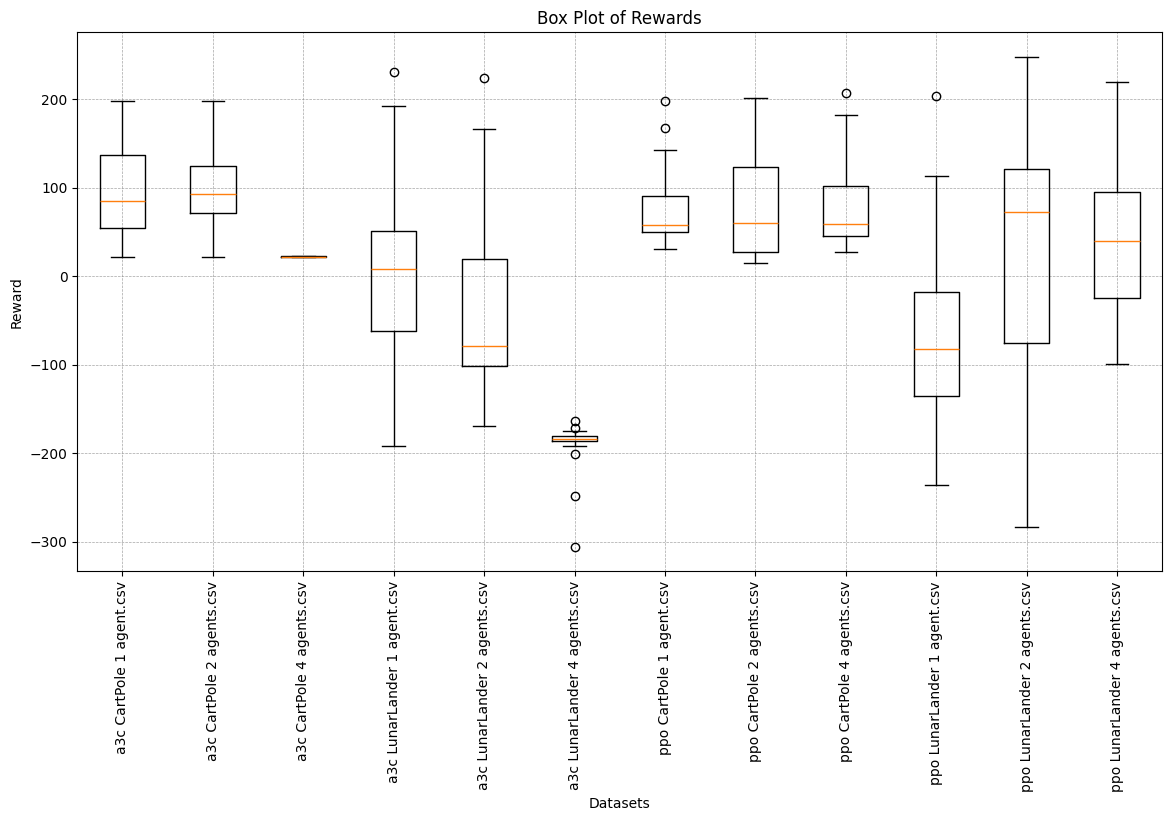

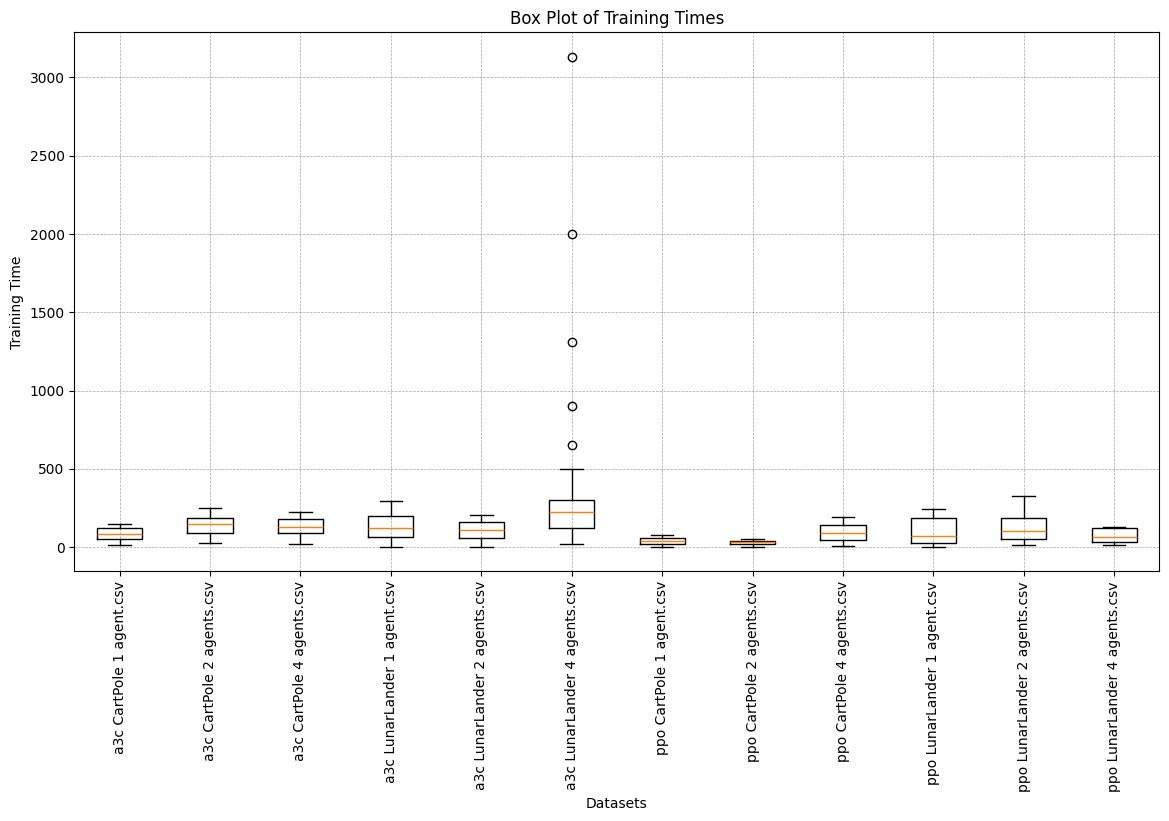

In [20]:
rewards = []
training_times = []
labels = []

# Iterate through the datasets to extract and save rewards and training time
for csv_file, df in dataframes.items():
    rewards.append(df['reward'])
    training_times.append(df['training_time'])
    labels.append(csv_file)

# Create boxplot to visualize rewards distribution
plt.figure(figsize=(14, 7))
plt.boxplot(rewards, tick_labels=labels)
plt.title('Box Plot of Rewards')
plt.xlabel('Datasets')
plt.ylabel('Reward')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

# Create boxplot to visualize training times distribution
plt.figure(figsize=(14, 7))
plt.boxplot(training_times, tick_labels=labels)
plt.title('Box Plot of Training Times')
plt.xlabel('Datasets')
plt.ylabel('Training Time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

Analizando los box plot, se pueden extraer varias conclusiones:

- A3C

    Las recompensas obtenidas para el entorno LunarLander muestra recompensas moderadamente negativas para LunarLander con 1 y 2 agentes con una variabilidad moderada, nientras que para 4 agentes hay recompensas consistentemente negativas, con poco variabilidad y algunos outliers. En el caso del entorno CartPole se obtienen recompensas negativas, con baja variabilidad para 4 agentes, una amplia variabilidad para 2 agentes, y una variabilidad moderada para 1 agente.

    Respecto a los tiempos de entrenamiento, a excepción del entorno LunarLander con 4 agentes, los demás escenarios presentan consistencia en los tiempos, con cierta variabilidad.

- PPO

    Las recompensas obtenidas presentan una alta variabilidad en todos los casos, y presencia de recompensas negativas para el entorno LunarLander con tendencia a mejorar. Además se observan varios outliers para el entorno CartPole cuando se utiliza 1 agente. Los agentes PPO presentan tiempos de entrenamiento más consistentes, especialmente para el entorno CartPole, y con cierta variabilidad para el entorno LunarLander.


En líneas generales, los agentes A3C presentan menos variabilidad en las recompensas obtenidas, excepto algunos casos con recompensas marcadamente negativas, mientras que los agentes PPO muestran menos consistencia, pero con recompensas máximas más altas. 

Por otro lado, la presencia de outliers sugiere que hay episodios en los que los agentes obtuvieron recompensas fuera del rango intercuartílico, lo que indica que hay episodios donde el rendimiento ha sido excepcionalmente bueno o malo.

En cuanto al tiempo de entrenamiento, el entorno CartPole muestra tiempos relativamente consistentes y más bajos en comparación con los del entorno LunarLander, que presentan mayor variabilidad y algunos outliers.

En resumen, es recomendable investigar las configuraciones que llevan a recompensas consistentemente negativas para los agentes A3C en LunarLander así como los factores que causan los tiempos de entrenamiento extremadamente altos, y qué variables incentivan la alta variabilidad de los agentes PPO.

Una vez hecha la exploración de la distribución de recompensas y tiempo de entrenamiento, se procede a evaluar la relación entre ambas características.

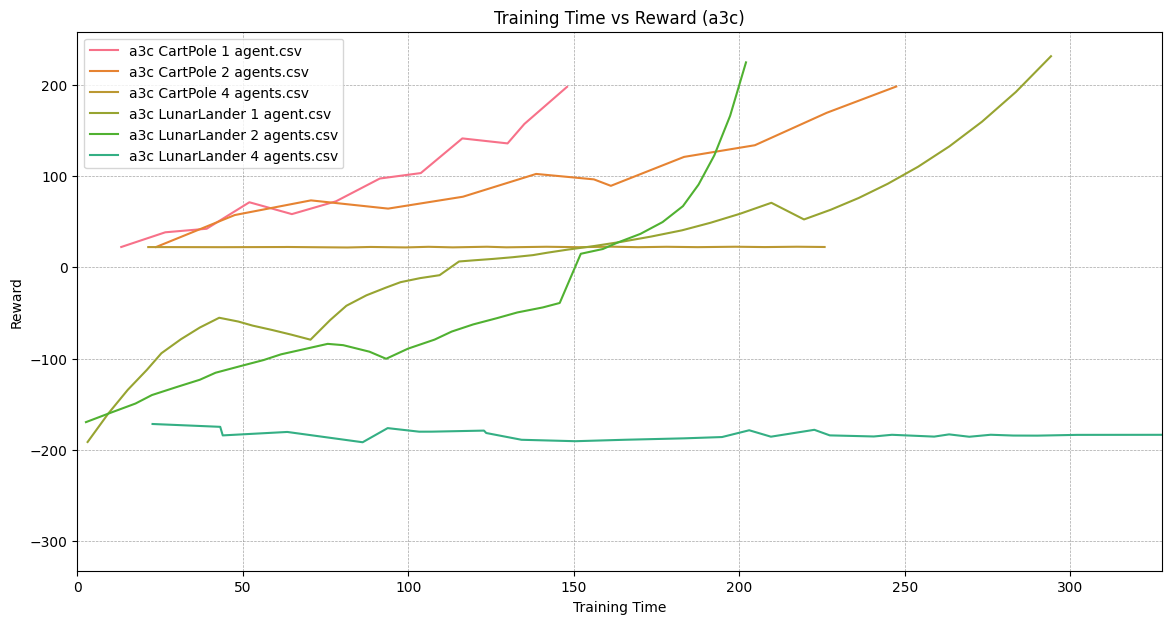

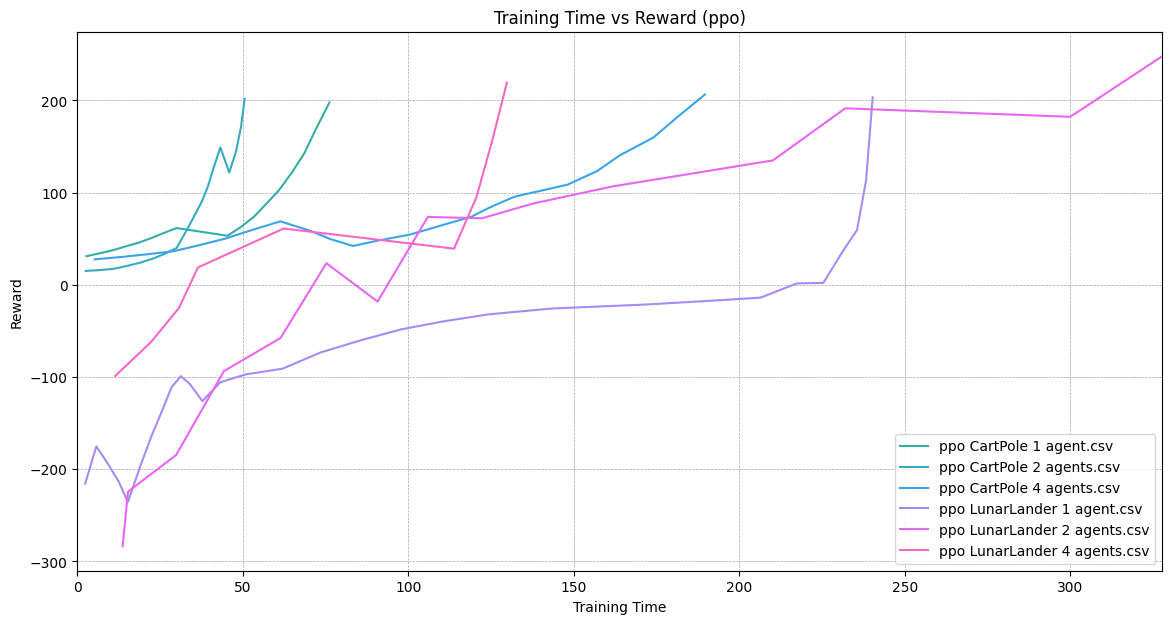

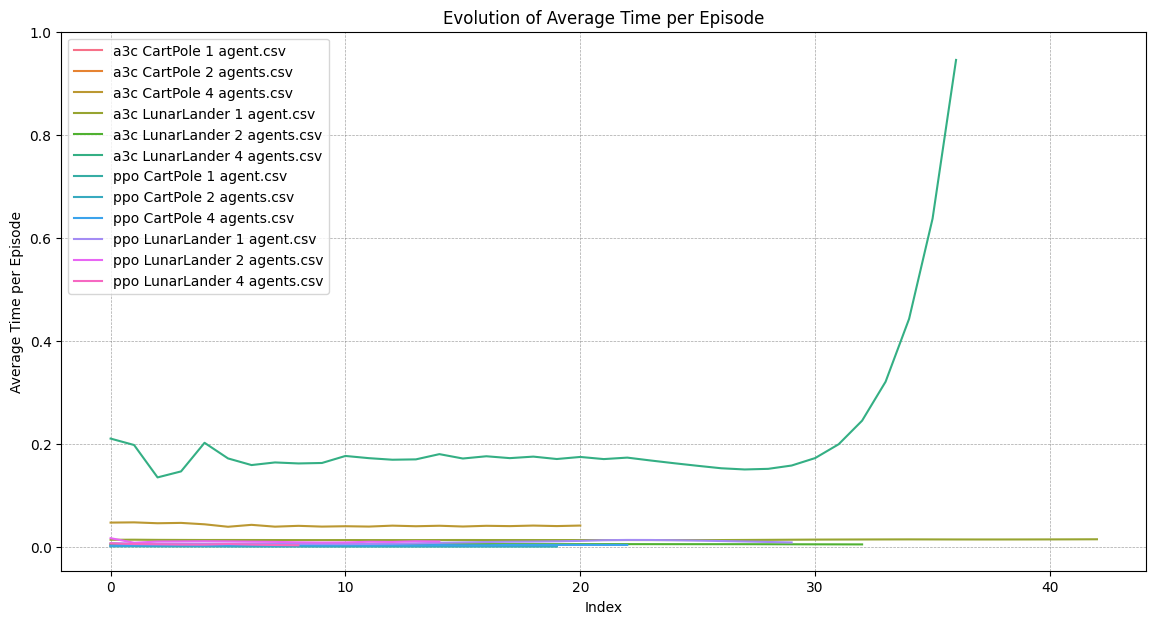

In [21]:
# Find the second maximum value of training_time
max_training_times = [df['training_time'].max() for df in dataframes.values() if 'training_time' in df.columns]
second_max_training_time = sorted(max_training_times)[-2]

# Define a color palette
colors = sns.color_palette('husl', len(dataframes))

# Plot training time and reward for a3c
plt.figure(figsize=(14, 7))
for i, (csv_file, df) in enumerate(dataframes.items()):
    if csv_file.startswith('a3c') and 'training_time' in df.columns and 'reward' in df.columns:
        plt.plot(df['training_time'], df['reward'], label=csv_file, color=colors[i])
plt.xlabel('Training Time')
plt.ylabel('Reward')
plt.title('Training Time vs Reward (a3c)')
plt.xlim(left=0, right=second_max_training_time)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.legend()
plt.show()

# Plot training time and reward for ppo
plt.figure(figsize=(14, 7))
for i, (csv_file, df) in enumerate(dataframes.items()):
    if csv_file.startswith('ppo') and 'training_time' in df.columns and 'reward' in df.columns:
        plt.plot(df['training_time'], df['reward'], label=csv_file, color=colors[i])
plt.xlabel('Training Time')
plt.ylabel('Reward')
plt.title('Training Time vs Reward (ppo)')
plt.xlim(left=0, right=second_max_training_time)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.legend()
plt.show()

# Plot average time per episode
plt.figure(figsize=(14, 7))
for i, (csv_file, df) in enumerate(dataframes.items()):
    if 'training_time' in df.columns and 'total_episodes' in df.columns:
        avg_time_per_episode = df['training_time'] / df['total_episodes']
        plt.plot(df.index, avg_time_per_episode, label=csv_file, color=colors[i])
plt.xlabel('Index')
plt.ylabel('Average Time per Episode')
plt.title('Evolution of Average Time per Episode')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.ylim(top=1)
plt.legend()
plt.show()

No se aprecia una variabilidad significativa en la duración promedio de un episodio para las diferentes configuraciones utilizadas, a excepción de los casos donde el algoritmo utilizado es A3C y se utilizan 4 agentes, especialmente en el caso del entorno LunarLander, lo que indica que ha habido algún problema durante el entrenamiento.

En cuanto a la relación entre el tiempo de entrenamiento y las recompensas, de nuevo se puede observar que para el método A3C cuando se utilizan 4 agentes, los modelos no tienen el comportamiento esperado, ya que no se aprecia una mejora en las recompensas a lo largo del tiempo. En las demás configuraciones existe cierta variabilidad pero se observa una tendencia ascendente en la recompensa media a lo largo del tiempo. Es de destacar que para el entorno CartPole, usar un agente ha resultado en un incremento más rápido de las recompensas, mientras que para el entorno LunarLander, se las recompensas aumentan más rápidamente cuando se usan dos agentes.

En el caso del algoritmo PPO, en el entorno CartPole la recompensa tiene un incremento más pronunciado si se usan dos agentes, y por el contrario tarda más en alcanzar una misma recompensa con 4 agentes. Por otro lado, para el entorno LunarLander el uso de un mayor número de agentes ha llevado a alcanzar la recompensa objetivo más rápido, como se puede observar para el caso de 4 agentes, y con el uso de un único ha agente el modelo ha tardado más en alcanzar la puntuación umbral.

En resumen, si se utiliza el entorno CartPole los agentes presentan una mayor estabilidad en el entrenamiento, pero se observa una correlación directa entre el número de agentes utilizados y el tiempo en alcanzar una puntuación dada. Por el contrario, en el entorno LunarLander se puede ver que existe una amplia variabilidad en el rendimiento inicial, y que se presenta una correlación inversa entre el número de agentes y el tiempo para alcanzar una mayor puntuación. Esto podría explicarse por la mayor complejidad de LunarLander, se explorará más adelante.

Por último, se explorará la distribución de las recompensas.

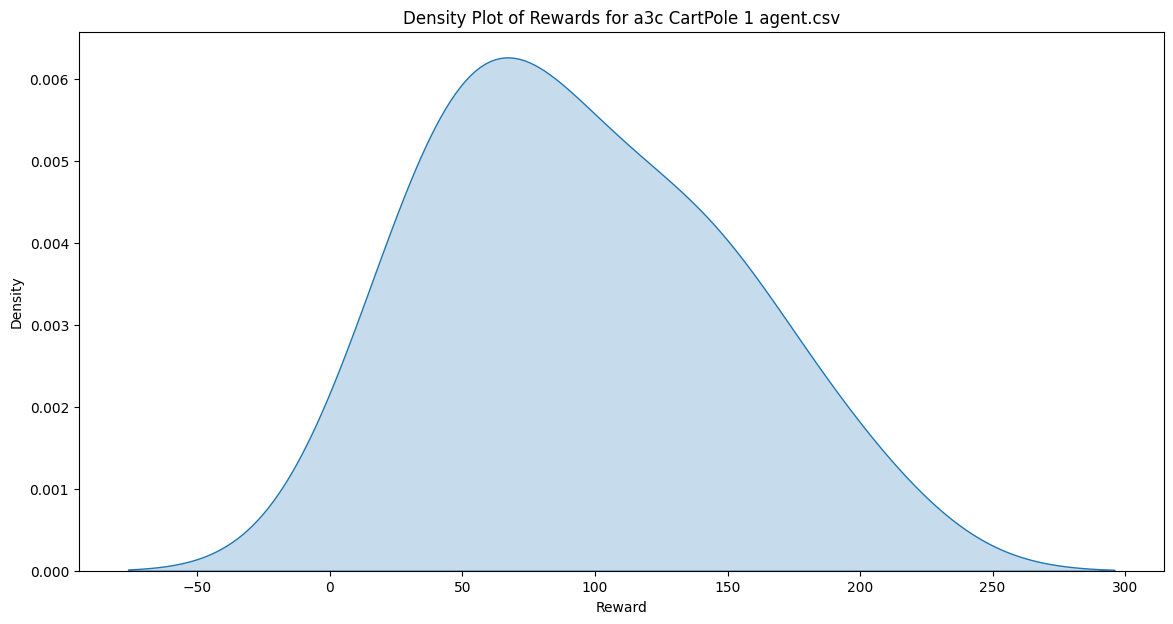

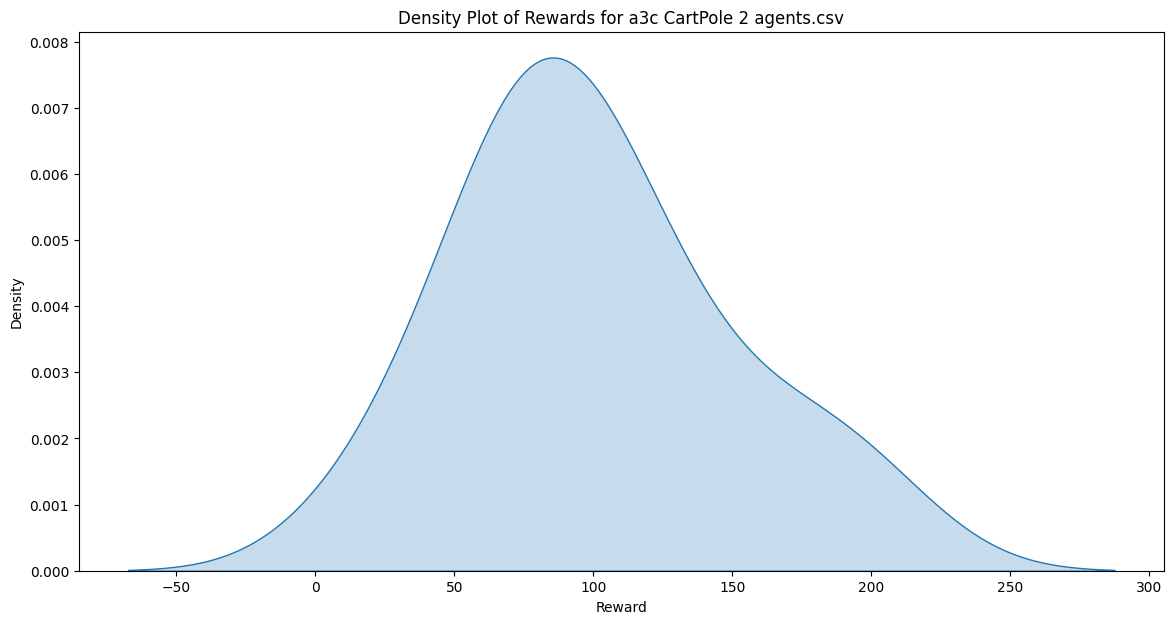

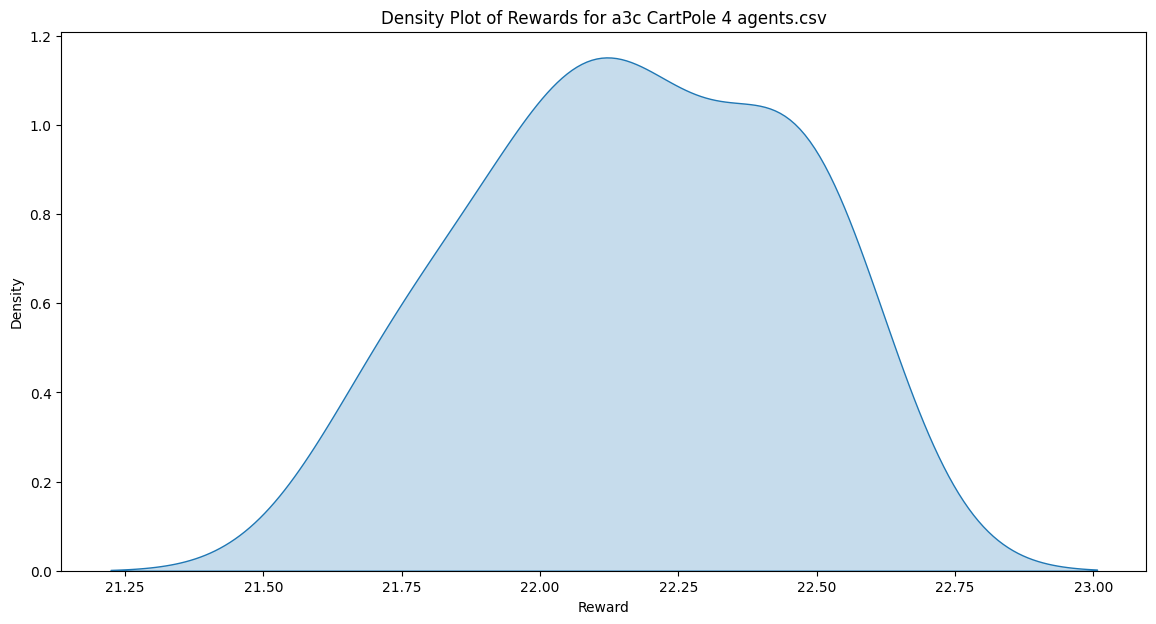

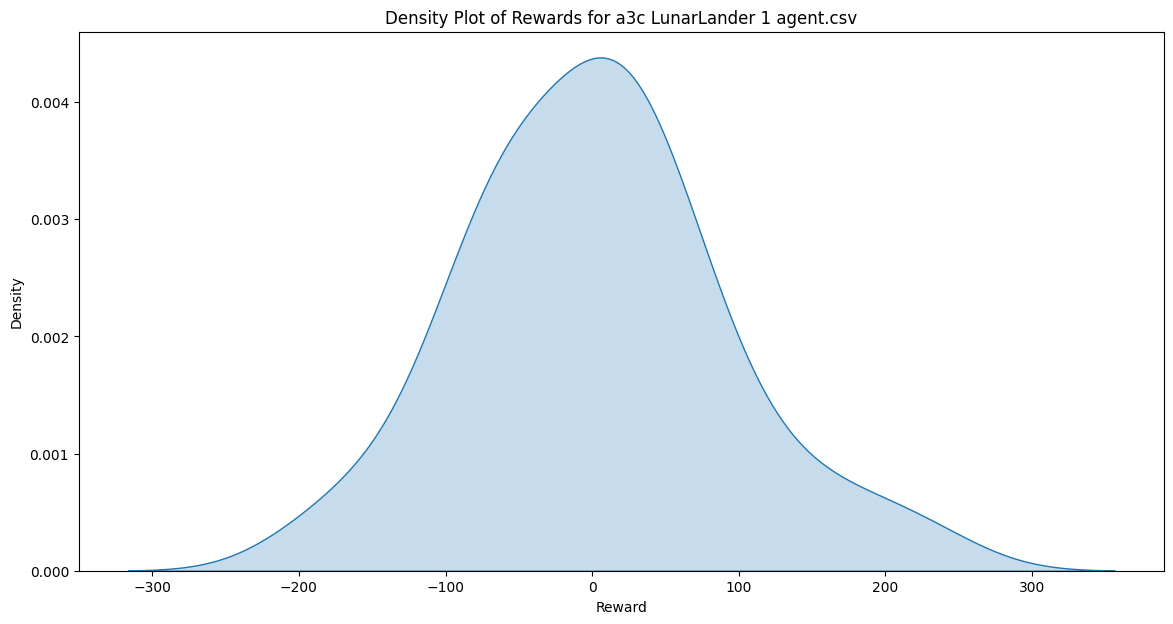

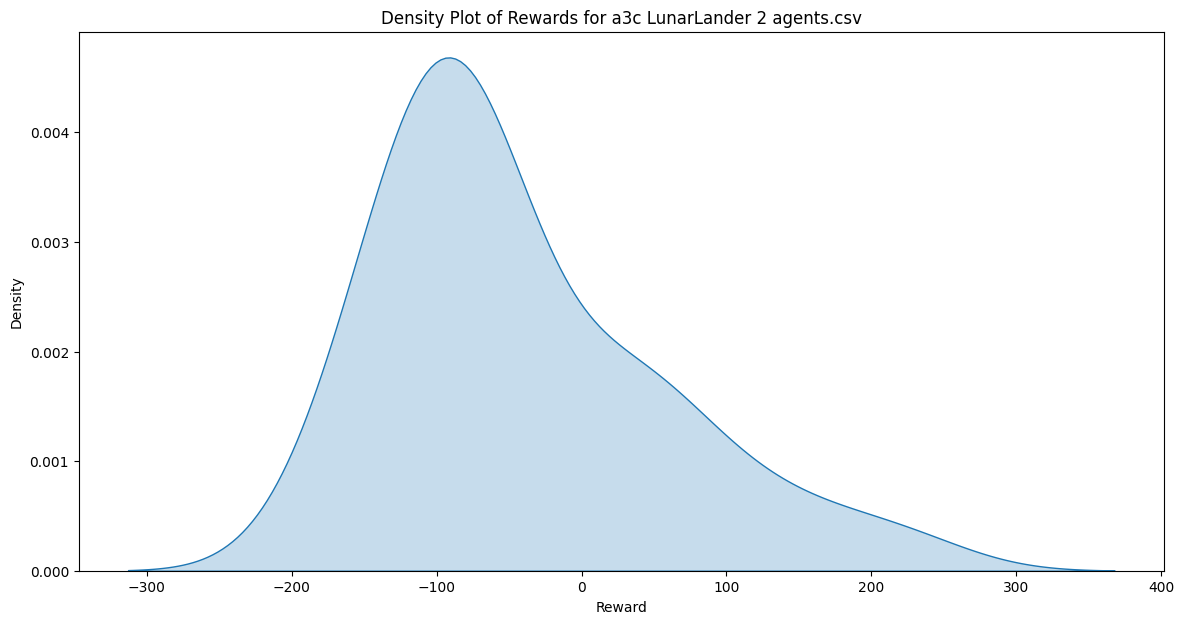

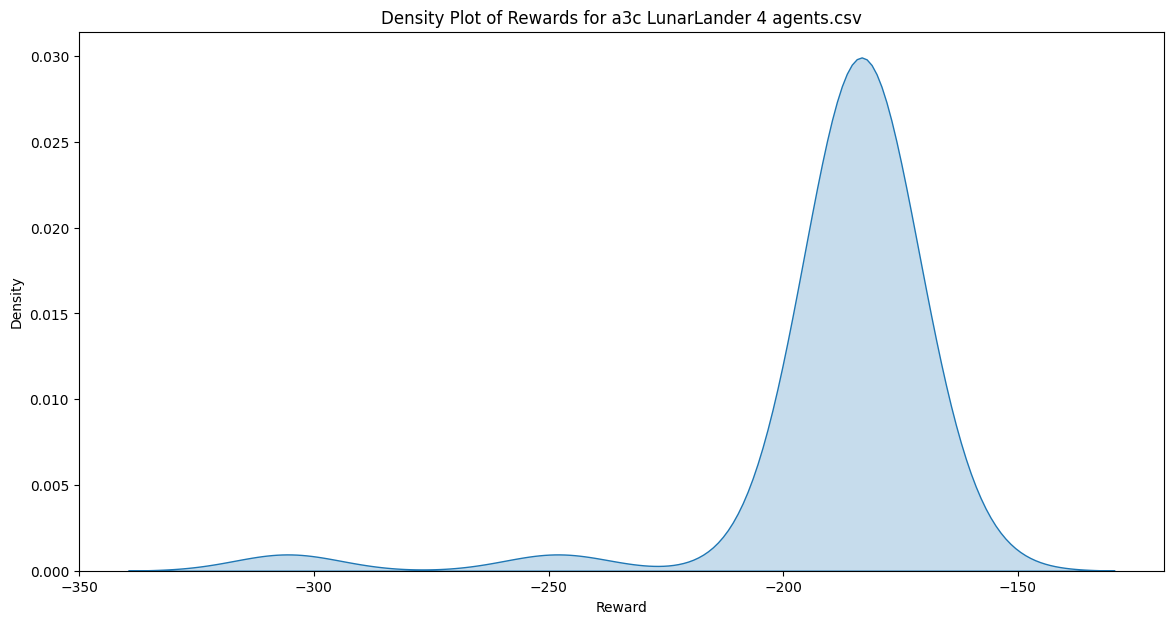

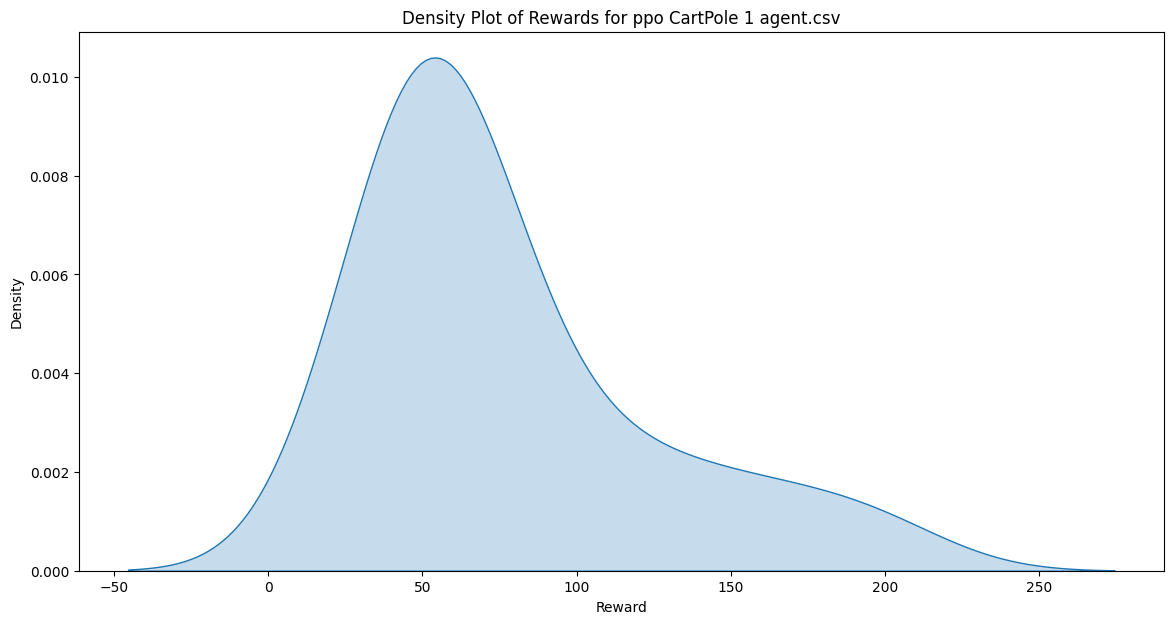

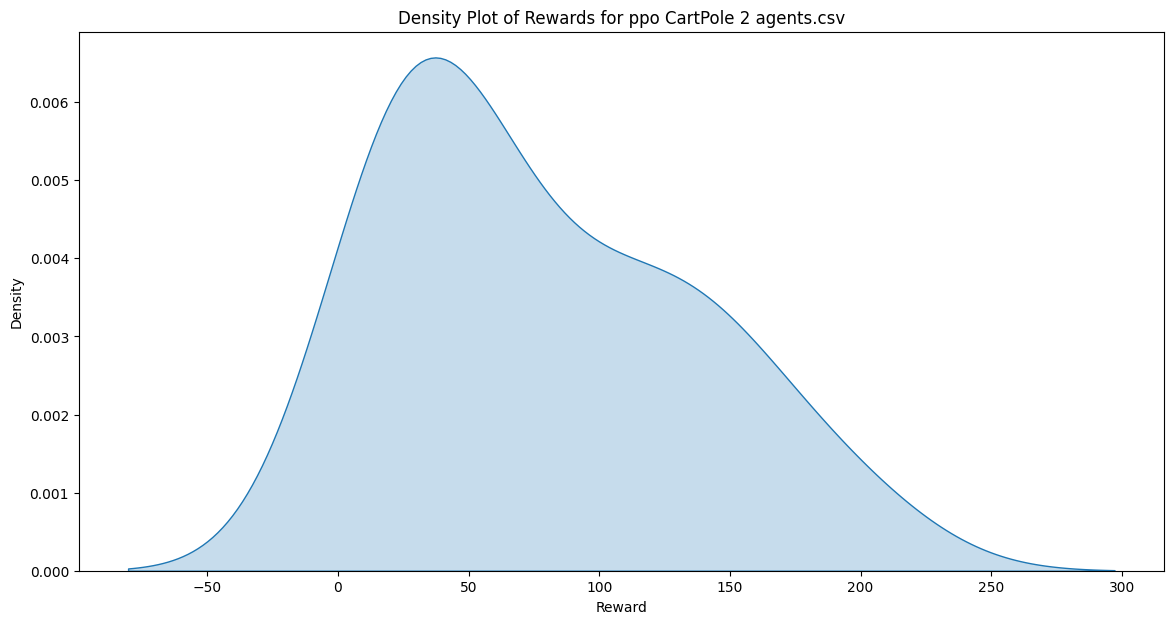

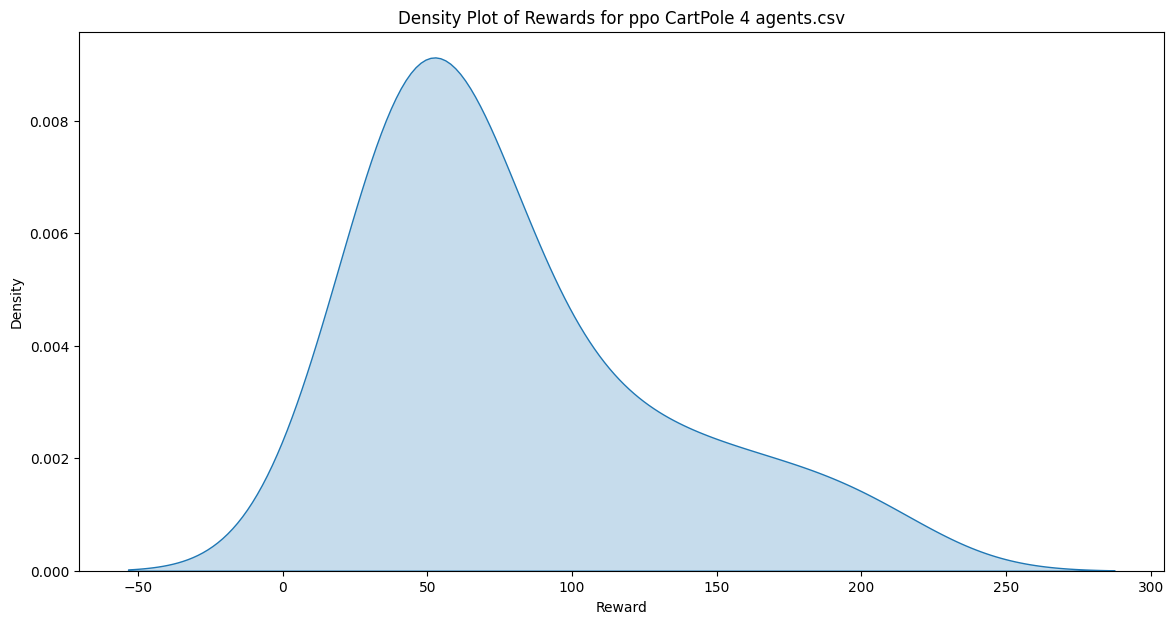

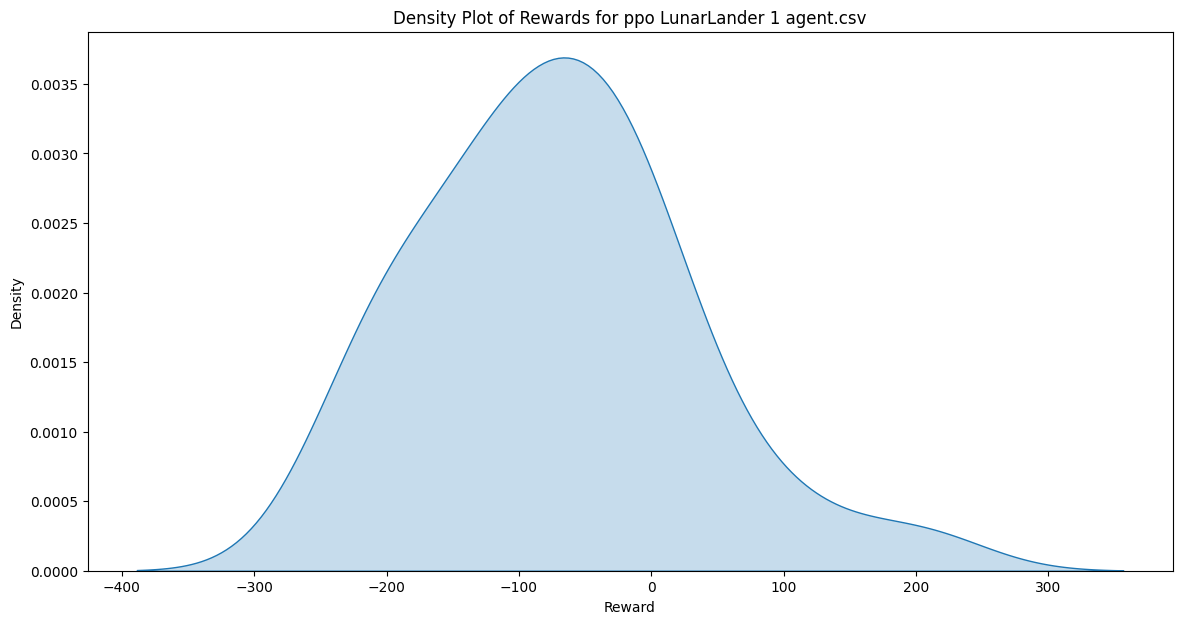

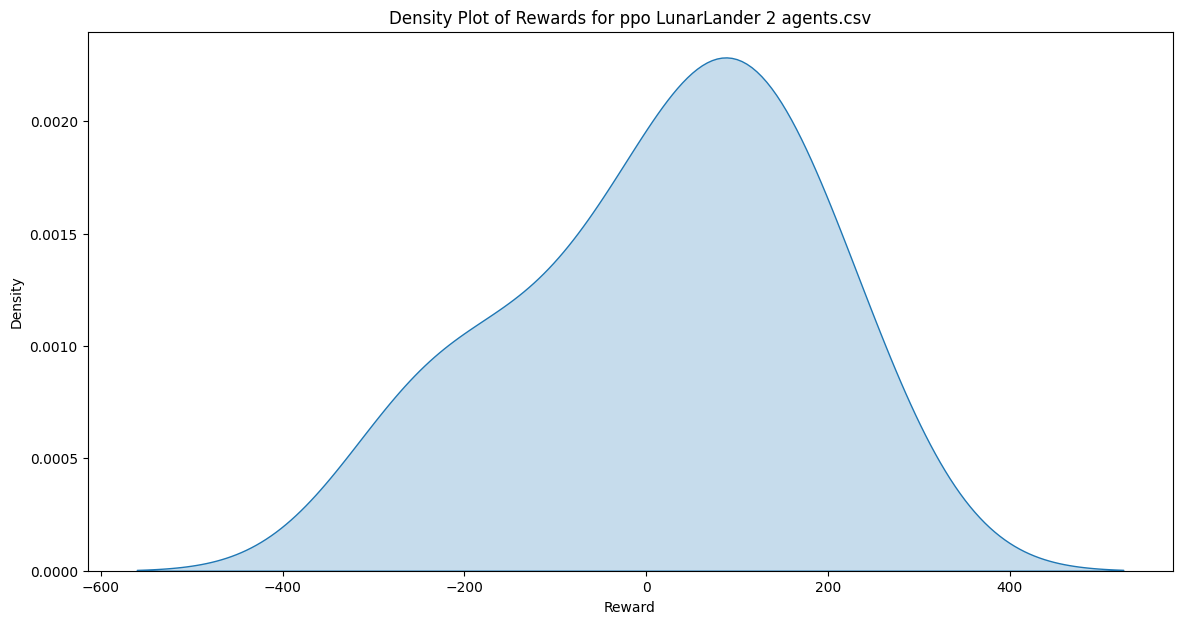

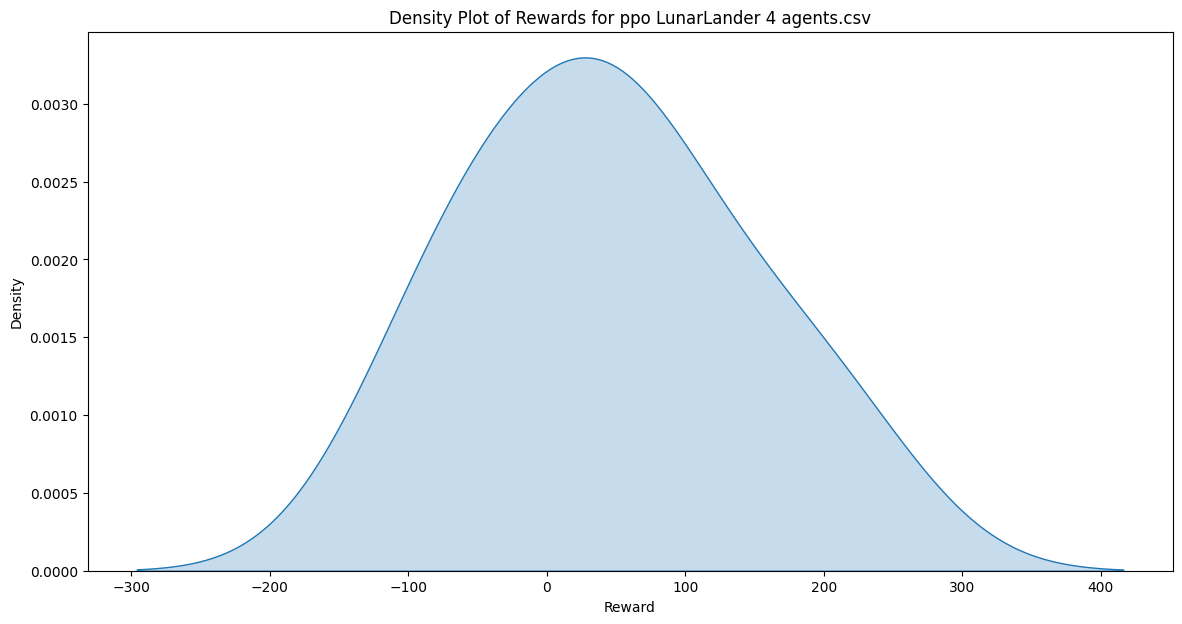

In [22]:
# Iterate through datasets to obtain rewards and plot density graph
for name, df in dataframes.items():
    plt.figure(figsize=(14, 7))
    sns.kdeplot(df['reward'], fill=True)
    plt.title(f'Density Plot of Rewards for {name}')
    plt.xlabel('Reward')
    plt.ylabel('Density')
    plt.show()

- CartPole

    Los agentes PPO muestran una mayor variabilidad así como potencial para alcanzar recompensas más altas, mientras que los agentes A3C tienes recompensas más consistentes. 

- LunarLander

    Los agentes PPO tienen una distribución más amplia de recompensas alcanzando recompensas tanto muy positivas como muy negativas. Por su parte, los agentes A3C presentan menos variabilidad pero con recompensas más bajas.

Es decir, en el entorno CartPole, los agentes tienden a tener recompensas más positivas y consistentes, especialmente los que se entrenan con el algoritmo PPO, mientras que en LunarLander hay una tendencia hacia las recompensas negativas. Los agentes A3C muestran mayor consistencia en las recompensas de para CartPole y un rendimiento generalmente negativo en el entorno LunarLander. Los agentes PPO presentan menos consistencia, pero alcanzan recompensas más positivas.

En resumen, los agentes entrenados en el entorno CartPole muestran una mayor estabilidad en las recompensas, especialmente los que utilizan el algoritmo PPO. Por su parte, los agentes en LunarLander tienen mayor variabilidad en las recompensas y tiempos de entrenamiento, con los agentes PPO alcanzando valores tanto muy altos como muy bajos. Los agentes A3C aunque son más consistentes en CartPole, muestran un rendimiento generalmente negativo en LunarLander. Todo esto sugiere que la elección del algoritmo y el número de agentes influye significativamente en el rendimiento y consistencia del aprendizaje, especialmente en entornos más complejos como LunarLander.

Antes de pasar al análisis estadístico, se comprueba el tiempo medio en alcanzar la puntuación umbral.

In [23]:
all_times = []
env_times = {'CartPole': [], 'LunarLander': []}
method_times = {'a3c': [], 'ppo': []}
agent_times = {1: [], 2: [], 4: []}
method_agent_times = {'a3c': {1: [], 2: [], 4: []}, 'ppo': {1: [], 2: [], 4: []}}
env_agent_times = {'CartPole': {1: [], 2: [], 4: []}, 'LunarLander': {1: [], 2: [], 4: []}}

# Iterate through each dataframe to calculate average times
for name, df in dataframes.items():
    if 'threshold' in df.columns and df['threshold'].any():
        avg_time = df[df['threshold'] == True]['training_time'].mean()
        all_times.append(avg_time)
        
        # Detect environment
        if 'CartPole' in name:
            env_times['CartPole'].append(avg_time)
            # Detect number of agents for CartPole
            if '1 agent' in name:
                env_agent_times['CartPole'][1].append(avg_time)
                agent_times[1].append(avg_time)
            elif '2 agents' in name:
                env_agent_times['CartPole'][2].append(avg_time)
                agent_times[2].append(avg_time)
            elif '4 agents' in name:
                env_agent_times['CartPole'][4].append(avg_time)
                agent_times[4].append(avg_time)
        elif 'LunarLander' in name:
            env_times['LunarLander'].append(avg_time)
            # Detect number of agents for LunarLander
            if '1 agent' in name:
                env_agent_times['LunarLander'][1].append(avg_time)
                agent_times[1].append(avg_time)
            elif '2 agents' in name:
                env_agent_times['LunarLander'][2].append(avg_time)
                agent_times[2].append(avg_time)
            elif '4 agents' in name:
                env_agent_times['LunarLander'][4].append(avg_time)
                agent_times[4].append(avg_time)
        
        # Detect method
        if name.startswith('a3c'):
            method_times['a3c'].append(avg_time)
            # Detect number of agents for a3c
            if '1 agent' in name:
                method_agent_times['a3c'][1].append(avg_time)
            elif '2 agents' in name:
                method_agent_times['a3c'][2].append(avg_time)
            elif '4 agents' in name:
                method_agent_times['a3c'][4].append(avg_time)
        elif name.startswith('ppo'):
            method_times['ppo'].append(avg_time)
            # Detect number of agents for ppo
            if '1 agent' in name:
                method_agent_times['ppo'][1].append(avg_time)
            elif '2 agents' in name:
                method_agent_times['ppo'][2].append(avg_time)
            elif '4 agents' in name:
                method_agent_times['ppo'][4].append(avg_time)

# Function to calculate mean, ignoring empty lists
def safe_mean(lst):
    return pd.Series(lst).mean() if lst else float('nan')

# Print results
print("Average time to reach threshold for all data: ", safe_mean(all_times))
print("Average time to reach threshold by environment: ", {k: safe_mean(v) for k, v in env_times.items()})
print("Average time to reach threshold by method: ", {k: safe_mean(v) for k, v in method_times.items()})
print("Average time to reach threshold by number of agents: ", {k: safe_mean(v) for k, v in agent_times.items()})
print("Average time to reach threshold by method and number of agents: ", 
        {method: {agents: safe_mean(times) for agents, times in agent_dict.items()} 
        for method, agent_dict in method_agent_times.items()})
print("Average time to reach threshold by environment and number of agents: ", 
        {env: {agents: safe_mean(times) for agents, times in agent_dict.items()} 
        for env, agent_dict in env_agent_times.items()})

Average time to reach threshold for all data:  197.32469255333334
Average time to reach threshold by environment:  {'CartPole': 142.340068916, 'LunarLander': 266.0554721}
Average time to reach threshold by method:  {'a3c': 222.88113859999999, 'ppo': 176.879535716}
Average time to reach threshold by number of agents:  {1: 189.6431970875, 2: 206.9360538825, 4: 189.6052291}
Average time to reach threshold by method and number of agents:  {'a3c': {1: 221.0525715, 2: 224.7097057, 4: nan}, 'ppo': {1: 158.233822675, 2: 189.16240206499998, 4: 189.6052291}}
Average time to reach threshold by environment and number of agents:  {'CartPole': {1: 112.06798452499999, 2: 148.979573215, 4: 189.6052291}, 'LunarLander': {1: 267.21840965, 2: 264.89253455, 4: nan}}


De los resultados se concluye que el tiempo promedio para alcanzar la puntuación umbral es mayor en LunarLander que en CartPole, lo que podría estar explicado por la mayor complejidad del entorno, que resulta más desafiante para los agentes.

Por otro lado, PPO alcanza la puntuación umbral en un tiempo significativamente menor, lo que sugiere que PPO es un método más eficiente en términos de tiempo de entrenamiento para alcanzar una puntuación umbral.

Aunque PPO es más rápido que A3C, ambos métodos alcanzan la puntuación umbral más rápido cuando se ejecutan un menor número de agentes en paralelo. A excepción del método A3C con 1 y 2 agentes, esto se repite para ambos métodos y entornos.


# Análisis estadístico

Una vez finalizada la exploración de los datos, se procede a aplicar modelos estadísticos para confirmar o descartar las suposiciones realizadas durante el proceso de exploración.

Después de explorar los conjuntos de datos, se ha concluido que existe una diferencia entre el rendimiento de los modelos según el método utilizado, y se ha encontrado una posible relación entre el tiempo de entrenamiento y la recompensa.

Para profundizar en esas conclusiones se empezará obteniendo la matriz de correlaciones entre cada par de variables.

In [24]:
# Show the correlation matrix for each dataset
for name, df in dataframes.items():
    corr_matrix = df.corr()
    print(f"Correlation Matrix for {name}:\n{corr_matrix}\n")

Correlation Matrix for a3c CartPole 1 agent.csv:
                total_episodes  training_time    reward  threshold
total_episodes        1.000000       0.998838  0.972676   0.476417
training_time         0.998838       1.000000  0.966051   0.455586
reward                0.972676       0.966051  1.000000   0.601376
threshold             0.476417       0.455586  0.601376   1.000000

Correlation Matrix for a3c CartPole 2 agents.csv:
                total_episodes  training_time    reward  threshold
total_episodes        1.000000       0.999718  0.945836   0.477063
training_time         0.999718       1.000000  0.949256   0.480722
reward                0.945836       0.949256  1.000000   0.626859
threshold             0.477063       0.480722  0.626859   1.000000

Correlation Matrix for a3c CartPole 4 agents.csv:
                total_episodes  training_time    reward  threshold
total_episodes        1.000000       0.998061  0.366197        NaN
training_time         0.998061       1.000000

En general, se observa una alta correlación positiva entre el número total de episodios, el tiempo de entrenamiento y las recompensas en la mayoría de los conjuntos de datos, lo que sugiere que más entrenamiento lleva a mejores recompensas.

En el entorno LunarLander, especialmente con A3C y 4 agentes, se observan correlaciones negativas entre el tiempo de entrenamiento y las recompensas obtenidas, lo que indica problemas en el rendimiento a medida que aumenta el entrenamiento.

Los agentes PPO muestran una correlación más alta entre recompensa y la puntuación umbral en comparación con los agentes A3C, lo que podría indicar que PPO es más eficaz para alcanzar recompensas objetivo.

La correlación entre la recompensa y la puntuación umbral varía significativamente entre los diferentes conjuntos de datos indicando que la capacidad de alcanzar recompensas objetivo no es consistente en todas las configuraciones.

A continuación se aplicará un contraste de hipótesis para comparar el rendimiento entre algoritmos, evaluar la efectividad del número de agentes y determinar la robustez de los algoritmos. Se plantean las siguientes hipótesis con un nivel de significancia α = 0.05 para cada combinación de entorno y número de agentes:

- **Hipótesis Nula (H0):** No hay diferencia significativa en las recompensas medias entre los agentes entrenados con A3C y PPO (μ_A3C = μ_PPO).
- **Hipótesis Alternativa (H1):** Hay una diferencia significativa en las recompensas medias entre los agentes entrenados con A3C y PPO (μ_A3C ≠ μ_PPO).

In [25]:
# Loop for specific agent counts: 1, 2, and 4
for i in [1, 2, 4]:
    try:
        # Load rewards for a3c and ppo in CartPole
        rewards_a3c_cartpole = dataframes[f'a3c CartPole {i} {"agent" if i == 1 else "agents"}.csv']['reward']
        rewards_ppo_cartpole = dataframes[f'ppo CartPole {i} {"agent" if i == 1 else "agents"}.csv']['reward']
        
        # Apply Student's t-test
        t_stat, p_value = ttest_ind(rewards_a3c_cartpole, rewards_ppo_cartpole, equal_var=False)
        
        # Print the results with the environment name and number of agents
        print(f"Environment: CartPole, Agents: {i}")
        print(f"T-statistic: {t_stat}, P-value: {p_value}\n")
    except KeyError as e:
        # Handle the case where data is not found for the given configuration
        print(f"Data not found for CartPole with {i} agent(s): {e}\n")

for i in [1, 2, 4]:
    try:
        # Load rewards for a3c and ppo in LunarLander
        rewards_a3c_lunarlander = dataframes[f'a3c LunarLander {i} {"agent" if i == 1 else "agents"}.csv']['reward']
        rewards_ppo_lunarlander = dataframes[f'ppo LunarLander {i} {"agent" if i == 1 else "agents"}.csv']['reward']
        
        # Apply Student's t-test
        t_stat, p_value = ttest_ind(rewards_a3c_lunarlander, rewards_ppo_lunarlander, equal_var=False)
        
        # Print the results with the environment name and number of agents
        print(f"Environment: LunarLander, Agents: {i}")
        print(f"T-statistic: {t_stat}, P-value: {p_value}\n")
    except KeyError as e:
        # Handle the case where data is not found for the given configuration
        print(f"Data not found for LunarLander with {i} agent(s): {e}\n")


Environment: CartPole, Agents: 1
T-statistic: 0.9471565349876473, P-value: 0.3545417422802932

Environment: CartPole, Agents: 2
T-statistic: 1.1799592480056647, P-value: 0.24854639366581907

Environment: CartPole, Agents: 4
T-statistic: -5.470817693857023, P-value: 1.6980189111725313e-05

Environment: LunarLander, Agents: 1
T-statistic: 3.260109526887389, P-value: 0.0018786493660725154

Environment: LunarLander, Agents: 2
T-statistic: -1.360075603240898, P-value: 0.18986391981068507

Environment: LunarLander, Agents: 4
T-statistic: -6.817055822690837, P-value: 0.0001203517947126176



Si el p-value es menor que el nivel de significación, se rechaza la hipótesis nula, en caso contrario no se rechaza la hipótesis nula. El p-value es menor que el nivel de significación (p < 0.05) para el entorno CartPole con 4 agentes, y el entorno LunarLander con 1 y con 4 agentes. En esos casos se rechaza la hipótesis nula.

Teniendo en cuenta lo expuesto, para el entorno CartPole hay diferencias significativas si se usan 4 agentes, mientras que para el entorno LunarLander, hay una diferencia significa con 1 y con 4 agentes.

Los resultados parecen indicar que PPO maneja mejor la complejidad adicional del entorno LunarLander y podría estar beneficiándose más de la concurrencia en el entorno CartPole.

En conclusión, la adición de agentes adicionales parece beneficiar a PPO en términos de rendimiento en ambos entornos, especialmente a medida que aumenta el número de agentes, lo que sugiere que PPO es más eficiente en la gestión de múltiples agentes y la complejidad adicional que esto conlleva. 

Por otro lado, A3C no muestra mejoras con la adición de más agentes, especialmente en entornos complejos, lo que puede indicar la necesidad de optimizar y ajustar A3C para manejar mejor la concurrencia y la colaboración entre agentes.

A continuación se realiza una regresión lineal sobre el número de episodios y la recompensa promedio. Aunque anteriormente se ha evaluado el impacto del tiempo de entrenamiento sobre la recompensa obtenida, ese método no tiene en cuenta la concurrencia de los agentes, ya que a mayor número de agentes, mayor es el número de episodios que se pueden procesar en un periodo de tiempo determinado.

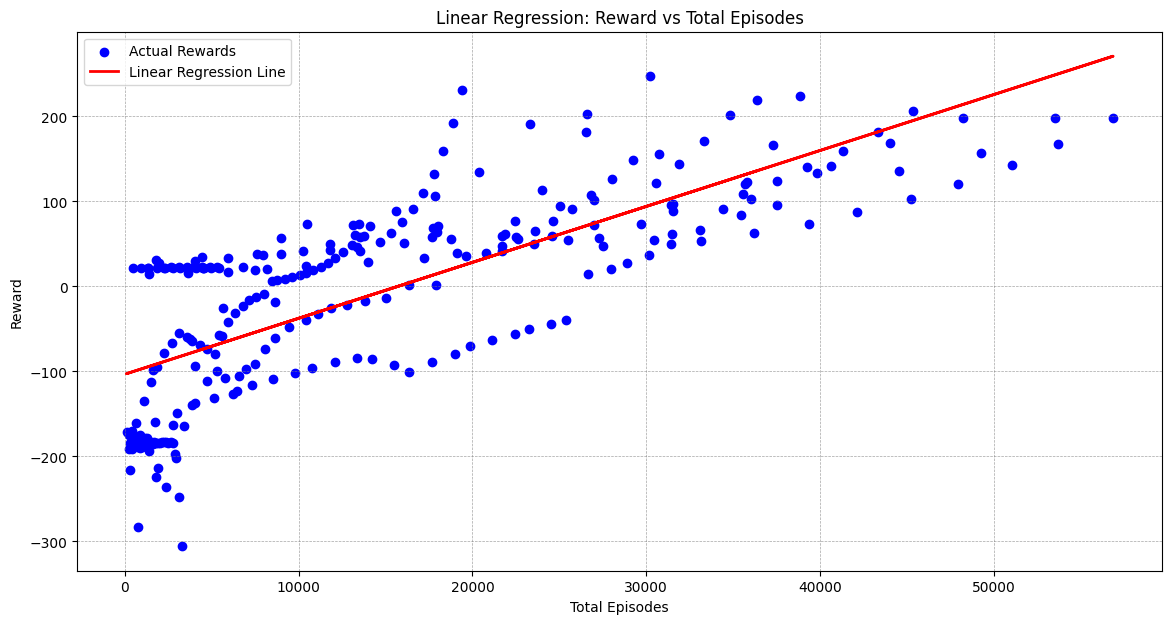

Intercept: -103.29746287620094
Coefficient: 0.00658142683341997
Mean Squared Error: 5835.311964479923
R^2 Score: 0.57262817965902


In [26]:
# Combine all dataframes into a single dataframe for analysis
all_data = pd.concat(dataframes.values(), ignore_index=True)

# Select the necessary columns
X = all_data[['total_episodes']]
y = all_data['reward']

# Ensure there are no NaN values in the selected data
X = X.dropna()
y = y.dropna()

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Predict values and calculate the regression line
y_pred = reg.predict(X)

# Plot the results
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='blue', label='Actual Rewards')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Reward vs Total Episodes')
plt.xlabel('Total Episodes')
plt.ylabel('Reward')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.show()

# Print the coefficients of the regression
print(f"Intercept: {reg.intercept_}")
print(f"Coefficient: {reg.coef_[0]}")

# Evaluate the model
# Calculate mean squared error and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Como en un entorno de entrenamiento real no es posible tener 0 episodios, descartamos el intercepto. Pero podemos ver según el coeficiente, que por cada episodio la recompensa se incrementa en 0.0066 aproximadamente.

El valor alto del MSE sugiere que en promedio hay una desviación significativa entre las recompensas predichas y las recompensas reales. A su vez, el coeficiente de determinación R^2 indica que aproximadamente el 57.3% de la variabilidad en las recompensas puede ser explicada por el número de episodios.

Dado que los agentes basados en A3C presentan un rendimiento deficiente cuando se ejecutan 4 agentes en paralelo y contienen varios outliers, se repite el análisis exluyendo esos conjuntos de datos.

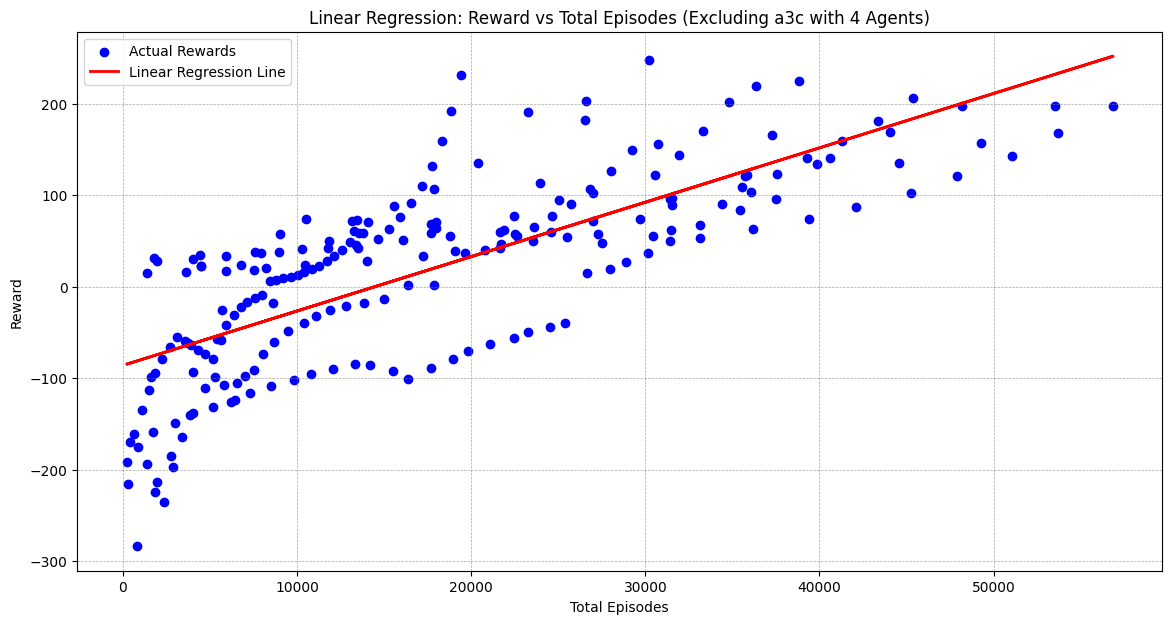

Intercept: -85.90604548022333
Coefficient: 0.005943089767097489
Mean Squared Error: 4586.184628936829
R^2 Score: 0.5750107808001126


In [27]:
# Combine all dataframes into a single dataframe for analysis
filtered_dataframes = {k: v for k, v in dataframes.items() if not (k.startswith('a3c') and k.endswith('4 agents.csv'))}

# Combine the filtered dataframes into one
all_data_filtered = pd.concat(filtered_dataframes.values(), ignore_index=True)

# Select the necessary columns
X = all_data_filtered[['total_episodes']]
y = all_data_filtered['reward']

# Ensure there are no NaN values in the selected data
X = X.dropna()
y = y.dropna()

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Predict values and calculate the regression line
y_pred = reg.predict(X)

# Plot the results
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='blue', label='Actual Rewards')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Reward vs Total Episodes (Excluding a3c with 4 Agents)')
plt.xlabel('Total Episodes')
plt.ylabel('Reward')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.show()

# Print the coefficients of the regression
print(f"Intercept: {reg.intercept_}")
print(f"Coefficient: {reg.coef_[0]}")

# Evaluate the model
# Calculate mean squared error and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Se puede observar que los valores relevantes son similares a los de la regresión lineal anterior. El modelo sugiere que hay una leve relación lineal positiva entre el número de episodios y las recompensas, aunque el incremento en la recompensa por episodio adicional es relativamente pequeño.

También se observa una cantidad de variabilidad considerable que no es explicada por el modelo, lo que indica que la precisión de este puede mejorar.

Para evaluar el impacto del diseño del entorno LunarLander, que por sus características hace improbable obtener recompensas positivas o cercanas a cero desde el inicio del entrenamiento, se evalúan los dos entornos por separado.

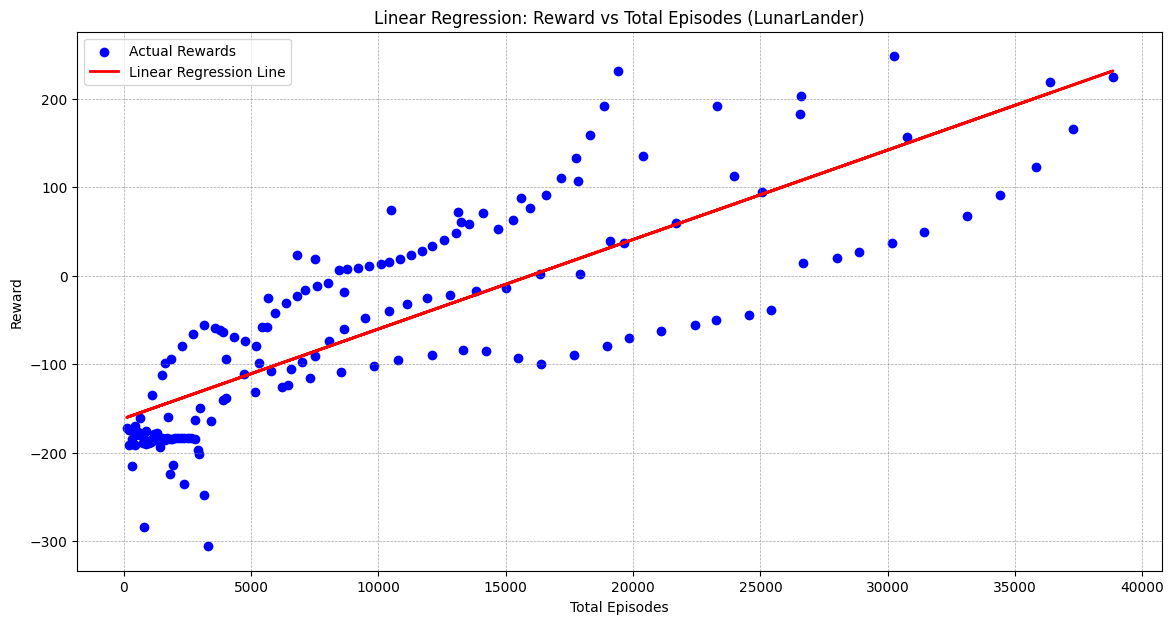

LunarLander Intercept: -161.2287617722869
LunarLander Coefficient: 0.010107289539384218
LunarLander Mean Squared Error: 4763.130356102138
LunarLander R^2 Score: 0.6612276791877998


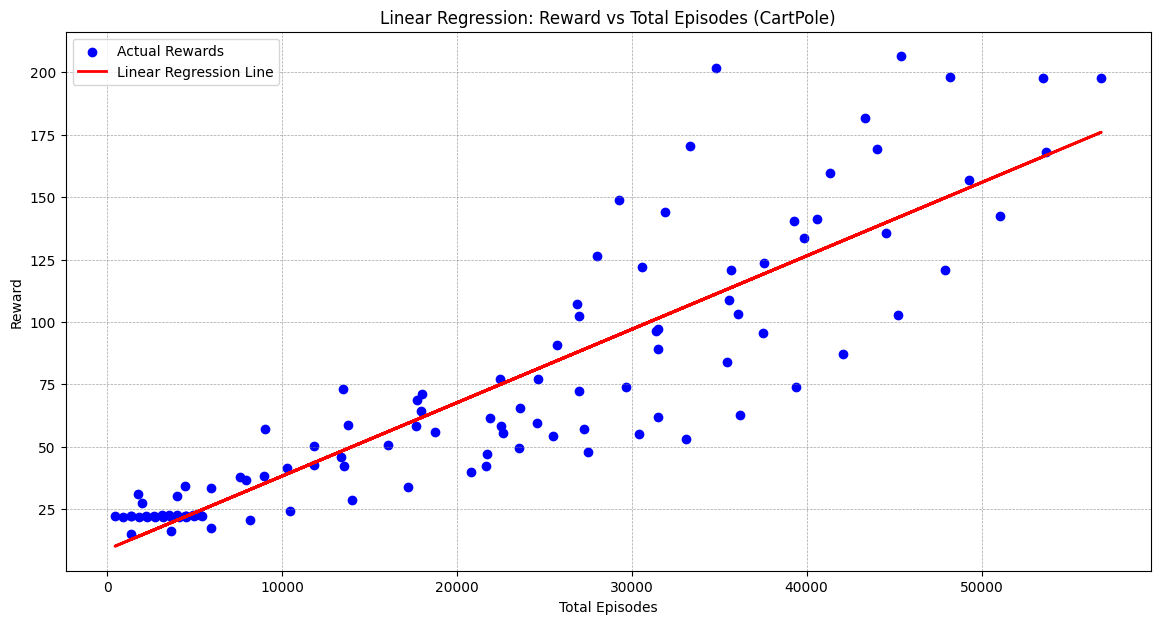

CartPole Intercept: 8.813041819592627
CartPole Coefficient: 0.0029411444250888215
CartPole Mean Squared Error: 586.8320637925718
CartPole R^2 Score: 0.7812827590062309


In [28]:
# Filter dataframes for LunarLander and CartPole separately
lunarlander_dataframes = {k: v for k, v in dataframes.items() if 'LunarLander' in k and not (k.startswith('a3c') and k.endswith('4_agents.csv'))}
cartpole_dataframes = {k: v for k, v in dataframes.items() if 'CartPole' in k and not (k.startswith('a3c') and k.endswith('4_agents.csv'))}

# Combine the filtered dataframes into one for each environment
all_data_lunarlander = pd.concat(lunarlander_dataframes.values(), ignore_index=True)
all_data_cartpole = pd.concat(cartpole_dataframes.values(), ignore_index=True)

# Ensure there are no NaN values in the selected data for LunarLander
X_lunarlander = all_data_lunarlander[['total_episodes']].dropna()
y_lunarlander = all_data_lunarlander['reward'].dropna()

# Fit the linear regression model for LunarLander
reg_lunarlander = LinearRegression()
reg_lunarlander.fit(X_lunarlander, y_lunarlander)

# Predict values and calculate the regression line for LunarLander
y_pred_lunarlander = reg_lunarlander.predict(X_lunarlander)

# Plot the results for LunarLander
plt.figure(figsize=(14, 7))
plt.scatter(X_lunarlander, y_lunarlander, color='blue', label='Actual Rewards')
plt.plot(X_lunarlander, y_pred_lunarlander, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Reward vs Total Episodes (LunarLander)')
plt.xlabel('Total Episodes')
plt.ylabel('Reward')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.show()

# Print the coefficients of the regression for LunarLander
print(f"LunarLander Intercept: {reg_lunarlander.intercept_}")
print(f"LunarLander Coefficient: {reg_lunarlander.coef_[0]}")

# Evaluate the model for LunarLander
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error and R^2 for LunarLander
mse_lunarlander = mean_squared_error(y_lunarlander, y_pred_lunarlander)
r2_lunarlander = r2_score(y_lunarlander, y_pred_lunarlander)

print(f"LunarLander Mean Squared Error: {mse_lunarlander}")
print(f"LunarLander R^2 Score: {r2_lunarlander}")

# Ensure there are no NaN values in the selected data for CartPole
X_cartpole = all_data_cartpole[['total_episodes']].dropna()
y_cartpole = all_data_cartpole['reward'].dropna()

# Fit the linear regression model for CartPole
reg_cartpole = LinearRegression()
reg_cartpole.fit(X_cartpole, y_cartpole)

# Predict values and calculate the regression line for CartPole
y_pred_cartpole = reg_cartpole.predict(X_cartpole)

# Plot the results for CartPole
plt.figure(figsize=(14, 7))
plt.scatter(X_cartpole, y_cartpole, color='blue', label='Actual Rewards')
plt.plot(X_cartpole, y_pred_cartpole, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Reward vs Total Episodes (CartPole)')
plt.xlabel('Total Episodes')
plt.ylabel('Reward')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.show()

# Print the coefficients of the regression for CartPole
print(f"CartPole Intercept: {reg_cartpole.intercept_}")
print(f"CartPole Coefficient: {reg_cartpole.coef_[0]}")

# Evaluate the model for CartPole

# Calculate mean squared error and R^2 for CartPole
mse_cartpole = mean_squared_error(y_cartpole, y_pred_cartpole)
r2_cartpole = r2_score(y_cartpole, y_pred_cartpole)

print(f"CartPole Mean Squared Error: {mse_cartpole}")
print(f"CartPole R^2 Score: {r2_cartpole}")

Al analizar los datos por separado, el modelo presenta un mejor ajuste para LunarLander, pero sigue presentando una desviación significativa entre las recompensas predichas y las reales.

Para CartPole se puede observar un buen ajuste de modelo, con un 78.1% de la variabilidad de las recompensas explicada por el número de episodios. También arroja un menor error cuadrático medio, lo que indica una mejor precisión del modelo en este entorno.


# Interpretación de los resultados

### Relación entre episodios y recompensas

En ambos entornos se observa una relación lineal positiva entre el número de episodios y las recompensas. Sin embargo, la magnitud de la relación es pequeña, lo que indica que otros factores influyen en las recompensas.

En el entorno CartPole el modelo de regresión lineal muestra un mejor ajuste (R² = 0.781), lo que significa que el 78.1% de la variabilidad en las recompensas puede ser explicada por el número de episodios.

Para el entorno LunarLander, el modelo de regresión lineal presenta un R² de 0.661, por lo que el 66.1% de la variabilidad en las recompensas puede ser explicada por el número de episodios.

### Impacto de los agentes adicionales

Los resultados del contraste de hipótesis indican que el algoritmo PPO maneja mejor la adición de agentes en ambos entornos. Especialmente en CartPole con 4 agentes y en LunarLander con 1 y 4 agentes, se rechasa la hipótesis nula, lo que indica una diferencia significativa en las recompensas medias entre los agentes entrenados con A3C y PPO. 

La adición de agentes parece beneficiar a PPO en términos de rendimiento, lo que sugiere que es más eficiente en la gestión de múltiples agentes y de la complejidad adicional.

### Rendimiento de los agentes respecto a puntuación umbral

De los datos obtenidos se concluye que en general, PPO es más eficiente que A3C en términos de tiempo de entrenamiento, y que LunarLander es un entorno más desafiante para el que los agentes requieren más tiempo hasta alcanzar la puntuación umbral.

### Variabilidad en el rendimiento

Los agentes A3C presentan un rendimiento más consistente en el entorno CartPole, pero muestran un rendimiento negativo en el entorno LunarLander. Por su parte, los agentes PPO presentan una mayor variabilidad en las recompensas pero alcanzan valores máximos más altos, especialmente en el entorno LunarLander.

### Limitaciones y suposiciones del análisis

La calidad y consistencia de los datos pueden afectar al análisis, es posible que haya ruido o sesgo en los datos que no se haya podido identificar, esto es especialmente relevante teniendo en cuenta que se dispone de un conjunto de datos pequeño y limitados a las configuraciones y entornos específicos utilizados, lo que puede no generalizarse a otros entornos o configuraciones de agentes.

Se asume una relación lineal entre el número de episodios y las recompensas, lo cual puede ser insuficiente para capturar la complejidad de la relación. Además, los modelos de regresión lineal no consideran interacciones no lineales entre las variables, lo que puede ser relevante en los entornos utilizados.